## Part 1. Gaussian quadrature

The Gaussian quadrature method is one of the methods of numerical integration that allows you to increase the accuracy of integration, by using orthogonal polynomials and their roots as nodes.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

here $\omega$ is the weight function, this weight function determines the basis of orthogonal polynomials whose roots are used as integration nodes. If the function $f(x)$ is a polynomial, then such an integration method gives *exact* value for the integral.

For example, let's calculate the following integral:
$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1}
$$

Here function is already polynomial, so we put the weight function $\omega(x) = 1$. Then the calculation of the integral reduces to the sum in the polynomials roots witch corresponding to the weight function $\omega(x) = 1$. For example, here https://dlmf.nist.gov/18.3 you may see which basis of polynomials corresponds to your weight function.

You may see, that Legendre polynomials correspond to our weight function. Now go to the documentation https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Here, the function *roots_legendre* immediately gives you the roots of the Legendre polynomial and weight at this roots (for Legendre polynomials all these weight are ones).


### Task 1.1
(20% of the grade)

1. Calculate the exact value of the integral ([1](#mjx-eqn-eq1)) using a pen and paper (or in your mind). Remember it, then you will compare numerical results with it.

$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1} = \left(\frac{7x^4}{4}- \frac{8x^3}{3} - \frac{3x^2}{2} + 3x\right)\bigg|_{-1}^{ 1} = \frac{2}{3}
$$


2. Calculate the value of the integral ([1](#mjx-eqn-eq1)) using the usual method of numerical integration on a uniform grid (for example, implemented by you in week_6_calculus homework). Estimate the number of nodes needed to achieve relative accuracy $10^{-10}$.

In [13]:
# Повторим способ, описанный в ДЗ №6

def midpoint_rule_mod(func, a, b, eps):
  
    # Сначала слелаем внутреннюю функцию, которая будет считать "интеграл" при заданном кол-ве элементарных отрезков.
    def f_help(N):
        summ = 0
        h = abs(b-a)/N # где N - кол-во отрезков, получаем ширину элементарного интервала.
        for i in range(N): # Проходимся по левым концам отрезков (от 0 до N-1)
            x = a + i*h + h/2 
            summ  += func(x)*h # добавляем в сумму площадей площадь очередного прямоугольничка.
        return(summ)
    # Теперь будем менять кол-во интервалов до тех пор, пока не достигнем желаемой точности...
    Int = 0 # Здесь будет лежать значение интеграла 
    N = 1
    delta = abs(f_help(N) - f_help(2*N))
    while delta >= eps:
        N = 2*N
        delta = abs(f_help(N) - f_help(2*N))
    #N = 2*N
    I = f_help(N)  # По договорённости (в лекциях советуют умножать последнее тестируемое число узлов на 2, однако я заметила, )
    return I, N                                                            # что желаемая точность достигается и без умножения
                                 # в любом случае...Нас просили ОЦЕНИТЬ число узлов, то есть умножение на 2 ничего не меняет
def f(x):
    return 7*x**3 - 8*x**2 - 3*x +3

i, n = midpoint_rule_mod(f, -1, 1, 10**(-10))
# Вычислим значение интеграла с помощью этой функции:
print('Значение интеграла',i)
print('Число элементарных отрезков',n)
print('Отклонение от точного значения =', abs(i - 2/3))

Значение интеграла 0.6666666667442743
Число элементарных отрезков 262144
Отклонение от точного значения = 7.760769804576739e-11


Таким образом, для достижения желаемой точности требуется несколько сотен тысяч узлов (250 - 500, зависит от договоренности, на ОЦЕНКУ не влияет)! Стоит отметить, что такой подход к решению задачи трудозатратнее, хотя не обеспечивает лучшую точность.

3. Calculate the integral ([1](#mjx-eqn-eq1)) using the roots of the Legendre polynomial from 1 to 6 degrees as nodes (to get roots and weigths use scipy.special.roots_legendre)

In [14]:
from scipy.special import roots_legendre
import numpy as np

def Leg(f, N): # N - максимальный номер полинома

    nodes = roots_legendre(N)[0] 
    F = f(nodes)
    wk = roots_legendre(N)[1]
    s = 0
    for n in range(N):
        s+= F[n]*wk[n]
    return(s)

for n in [1, 2, 3, 4, 5, 6]:
    print('Степень полинома =', n,' ',  'Значение интеграла =', Leg(f, n),' ', 'delta =', abs(2/3 -Leg(f,n)))

Степень полинома = 1   Значение интеграла = 6.0   delta = 5.333333333333333
Степень полинома = 2   Значение интеграла = 0.6666666666666674   delta = 7.771561172376096e-16
Степень полинома = 3   Значение интеграла = 0.6666666666666639   delta = 2.7755575615628914e-15
Степень полинома = 4   Значение интеграла = 0.6666666666666667   delta = 1.1102230246251565e-16
Степень полинома = 5   Значение интеграла = 0.6666666666666685   delta = 1.887379141862766e-15
Степень полинома = 6   Значение интеграла = 0.6666666666666695   delta = 2.886579864025407e-15


Понятно, почему мы видим то, что видим. Минимальный номер полинома в нашей задаче должен быть равен 2, так как $2\cdot 2 - 1 \geq 3$. Именно из-за этого получилась такая огромная ошибка при первом вычислении, а при использовании номеров, больше второго, ошибка практически не менялась.

Compare the number of nodes needed to obtain the same accuracy in both numerical methods.

Чтобы сравнивать количество узлов, нужно научиться задавать точность в методе с полиномами Лежандра (в методе с равномерной сеткой мы уже умеем это делать). Нам повезло, и мы знаем ответ. Будем увеличивать кол-во узлов до тех пор, пока отклонение о точного решения не станет меньше заданной точности.

In [15]:
from scipy.special import roots_legendre
import numpy as np

def Leg(f, N): # N - максимальный номер полинома

    nodes = roots_legendre(N)[0] 
    F = f(nodes)
    wk = roots_legendre(N)[1]
    s = 0
    for n in range(N):
        s+= F[n]*wk[n]
    return(s)

def nodes_number(Leg, f, I, eps):# ТО есть это сравнение ИМЕНО ДЛЯ НАШЕГО ИНТЕГРАЛА (не требовалась написать общий метод сравнения)
    n = 1 
    while 0==0:
        if abs(Leg(f, n) - I) >= eps:
            n = n + 1
        else:
            return(n)
        
#print('Степень полинома =', n,' ',  'Значение интеграла =', Leg(f, n),' ', 'delta =', abs(2/3 -Leg(f,n)))

# Вот теперь начнём сранивать

I = 2/3 # Значение интеграла
for i in range(1, 13): # Я решила ограничиться минус 12-ой степенью, так как дальше равномерная сетка работает миллион лет,
    eps = 10**(-i)       # а нагляднее не становится, так как метод с полиномами Лежандра хорош с самого начала
    print('Точность = ', eps, ' кол-во узлов для равномерной сетки = ', midpoint_rule_mod(f, -1, 1, eps)[1],' кол-во узлов для второго метода = ',nodes_number(Leg, f, I, eps) )

Точность =  0.1  кол-во узлов для равномерной сетки =  8  кол-во узлов для второго метода =  2
Точность =  0.01  кол-во узлов для равномерной сетки =  32  кол-во узлов для второго метода =  2
Точность =  0.001  кол-во узлов для равномерной сетки =  64  кол-во узлов для второго метода =  2
Точность =  0.0001  кол-во узлов для равномерной сетки =  256  кол-во узлов для второго метода =  2
Точность =  1e-05  кол-во узлов для равномерной сетки =  1024  кол-во узлов для второго метода =  2
Точность =  1e-06  кол-во узлов для равномерной сетки =  2048  кол-во узлов для второго метода =  2
Точность =  1e-07  кол-во узлов для равномерной сетки =  8192  кол-во узлов для второго метода =  2
Точность =  1e-08  кол-во узлов для равномерной сетки =  32768  кол-во узлов для второго метода =  2
Точность =  1e-09  кол-во узлов для равномерной сетки =  65536  кол-во узлов для второго метода =  2
Точность =  1e-10  кол-во узлов для равномерной сетки =  262144  кол-во узлов для второго метода =  2
Точнос

Очевидно, что методу, использующему полиномы Лежандра, для достижения заданной точности требуется ЗНАЧИТЕЛЬНО меньше узлов. (Так получается из-за того, что уже при двух узлах точность достигает 10^(-15)).

### Task 1.2
(20% of the grade)

Calculate the value of the same integral, but on the interval from 0 to 10.
$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Please note that you can no longer directly use Legendre polynomials, because they are defined for the interval (-1,1). But you can always make an *affine transformation* (a transformation that does not change the area) in order to go to the desired coordinate system.

$$
\int_{a}^{b} f(x) dx = \frac{b-a}{2}\int_{-1}^{1} f\left(\frac{b-a}{2}x + \frac{a+b}{2}\right) dx
$$
$$
$$
Тогда можно преобразовать исходный интеграл следующим образом:
$$
$$
$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx = 5\int_{-1}^{1} \left(7(5x + 5)^3 - 8(5x + 5)^2 - 3(5x + 5) + 3\right) dx = 5\int_{-1}^{1} \left(7\cdot125(x + 1)^3 - 8\cdot25(x + 1)^2 - 3\cdot5(x + 1) + 3\right) dx = 5\int_{-1}^{1} \left(875(x + 1)^3 - 200(x + 1)^2 - 15(x + 1) + 3\right) dx = \frac{44140}{3}
$$


Теперь можно использовать полиномы Лежандра.

In [16]:
from scipy.special import roots_legendre
import numpy as np

def F(x):
    return 875*(x+1)**3 - 200*(x+1)**2 -15*(x+1)+3

I = Leg(F, 2) # Берём именно 2, так как 2*2-1 = 3, что >= степени полинома (3), то есть вычисление должно производиться точно.
print('Значение интеграла =', I*5)


Значение интеграла = 14713.333333333332


Compare the result with the exact value of the integral.

In [17]:
print('Отклонение от точного значения =', abs(5*I - 44140/3))

Отклонение от точного значения = 1.8189894035458565e-12


Если очень хочется (а нам всегда хочется...) можно посчитать ещё несколькими способами (имею в виду, что будем использовать разное число узлов).

In [18]:
for i in range(3, 7):
    print('Число узлов =', i, "отклонение от точного значения =", abs(5*I - 44140/3))
    

Число узлов = 3 отклонение от точного значения = 1.8189894035458565e-12
Число узлов = 4 отклонение от точного значения = 1.8189894035458565e-12
Число узлов = 5 отклонение от точного значения = 1.8189894035458565e-12
Число узлов = 6 отклонение от точного значения = 1.8189894035458565e-12


Заключаем, что точность та же (или изменилась так незначительно, что это нельзя отобразить).

### Task 1.3
(20% of the grade)

Calculate the value of the following integral:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
by using the corresponding basis of orthogonal polynomials. 
Find the degree of the polynomial (number of nodes) at which the accuracy of the integral starts to exceed the double floating point accuracy.

$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}} = \int_{0}^{1} \frac{cos(2\pi x) dx }{\sqrt{1 - x^2}} = \frac{1}{2}\int_{-1}^{1} \frac{cos(2\pi x) dx }{\sqrt{1 - x^2}}
$$

Пользуясь таблицами, выясняем, что нам подойдёт базис из полиномов Чебышева первого рода. Для нахождения узлов и весов будем использовать библиотечную функцию scipy.special.roots_chebyt

In [19]:
from scipy.special import roots_chebyt
import numpy as np

def Cheb(f, N): # N - степень полинома

    nodes = roots_chebyt(N)[0] 
    F = f(nodes)
    wk = roots_chebyt(N)[1]
    s = 0
    for n in range(N):
        s+= F[n]*wk[n]
    return(s)

def cos(x): # Интегрируемая функция 
    return(np.cos(np.pi*2*x))


Отлично, теперь мы умеем считать этот интеграл с помощью полиномов Чебышева. Для контроля точности вычислений будем наблюдать за отклонением численного решения от аналитического. Исходный интеграл берётся аналитически: 

$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}} = \frac{1}{2}\pi J_{0}(2\pi)
$$

Отклонение = 1.1102230246251565e-16 кол-во узлов = 15
Отклонение = 1.1102230246251565e-16 кол-во узлов = 16
Отклонение = 2.220446049250313e-16 кол-во узлов = 17
Отклонение = 0.0 кол-во узлов = 18
Отклонение = 0.0 кол-во узлов = 19


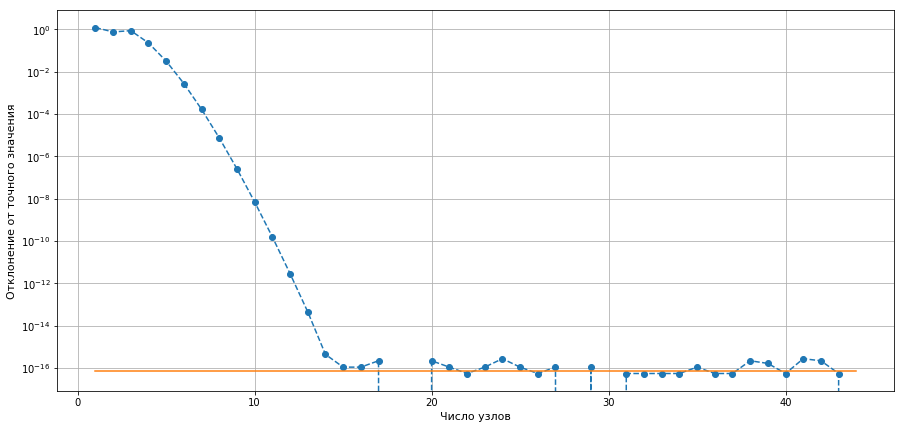

In [20]:
from scipy import special
import matplotlib.pyplot as plt

J0 = special.jn(0, 2*np.pi) # Библиотечная функция Бесселя  с индексом "0" в точке х = 2pi
I = np.pi*J0/2
# Построим график зависимости отклонения численного решения от аналитического
i_lst = []
y_lst = []
const = []
for i in range(1,45):
    const.append(2.2*10**(-16)*I)
    i_lst.append(i)
    y_lst.append(abs(I - Cheb(cos, i)/2)) # отклонения

plt.figure(figsize=(15, 7)) 
plt.semilogy(i_lst, y_lst, '--o')
plt.semilogy(i_lst, const)  # Также построим значение требуемой точности, равное 2.2*10^(-16)*точное значение интеграла
plt.grid()
plt.xlabel('Число узлов', fontsize = 11)
plt.ylabel('Отклонение от точного значения', fontsize = 11)
print('Отклонение =', abs(I - Cheb(cos,15)/2),'кол-во узлов = 15')
print('Отклонение =',abs(I - Cheb(cos,16)/2), 'кол-во узлов = 16')
print('Отклонение =',abs(I - Cheb(cos,17)/2), 'кол-во узлов = 17')
print('Отклонение =',abs(I - Cheb(cos,18)/2), 'кол-во узлов = 18')
print('Отклонение =',abs(I - Cheb(cos,19)/2), 'кол-во узлов = 19')

Таким образом, первый раз точность вычислений превышает заданную при использовании 18-ти узлов.

## Part 2. Fredholm equation

There are two types of Fredholm equations. 

1. Fredholm equation of the first kind:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Fredholm equation of the second kind:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Here higtlighted function $f(x)$ is unknown, kernel function $K(x, t)$ and given function $g(x)$, $\lambda$ is a real number. Numerically, Fredholm equations of the first kind are very ill-conditioned. We will consider equations of the second kind only.

The basic idea is to approximate the integral by some quadrature formula

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

with appropriate weights $w_j$ and nodes $t_j$ and $j=1, \dots, N$. The accuracy of the approximation is controlled by $N$.

This way, the FE is approximated by 

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Note that here $x$ is a continuous variable, and we only discretized $t$.


Evaluating this equation on the grid $x = t_k$, we obtain

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

where $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. This is nothing but a system of linear algebraic equations for the vector of $\color{blue}{f_j}$.

Its solution gives the values of the unknown function $f(x)$ at the discrete values $x=t_j$ for $j=1, \dots, N$.

### Task 2.1
(20% of the grade)

Solve an example Fredholm equation of the second kind

$$
f(x) = \sin(\pi x)  + \frac{1}{2} \int_0^1\! f(t) \, dt
$$

Here $a, b = 0, 1$, $\lambda = \dfrac{1}{2}$, the kernel is $K(x, t) = 1$ and the right-hand side $g(x) = \sin(\pi x)$.

In fact, the exact solution is (В. А. Попов, Сборник задач по интегральным уравнениям, 2006, стр. 5)

$$
f(x) = \sin(\pi x) + \frac{2}{\pi}
$$

For the integral, we can use a Gaussian quadrature with the weight function $w(x) = 1$ on $(0, 1)$. Looking at http://dlmf.nist.gov/18.3, and find the corresponding function in *scipy.special* (pay attention to the integration interval).

Compare the obtained function values with the true solution for different values of $N$. What value of $N$ can you stop at?

Сначала подберём подходящие полиномы по таблице...Нам нужны сдвинутые полиномы Лежандра, узлы и веса для которых можно получить с помощью библиотечной функции scipy.special.sh_legendre

In [21]:
# Функция общего вида
def FE_sol(a, b, lmbd, K, g, N):
    
    nodes = special.ps_roots(N)[0] # Задаём узлы и веса
    w = special.ps_roots(N)[1]
    A = np.empty((N, N)) # Матрица для решения системы уравнений
    
    for i in range(N):
        for j in range(N):
            A[i, j] = w[j] * K(nodes[i], nodes[j])

    Y = np.eye(N) - lmbd*A # Итоговая матрица, которая умножается на вектор f
    b = [g(_) for _ in nodes]
    
    res = np.linalg.solve(Y, b) # Решаем систему уравнений, о которой говорилось в теории выше
    
    return nodes, res

Теперь нужно проверить, что функция работает, и сравнить полученную функцию с точным решением предложенного уравнения Фредгольма для разных N.

Text(0.5, 1.0, 'Сравним полученные в узлах значения функции с точными значениями')

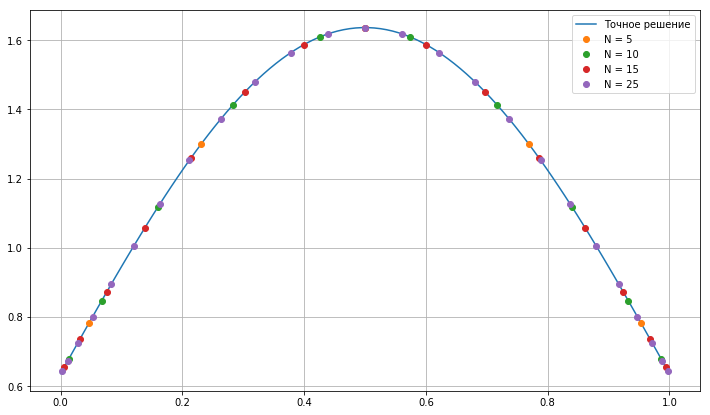

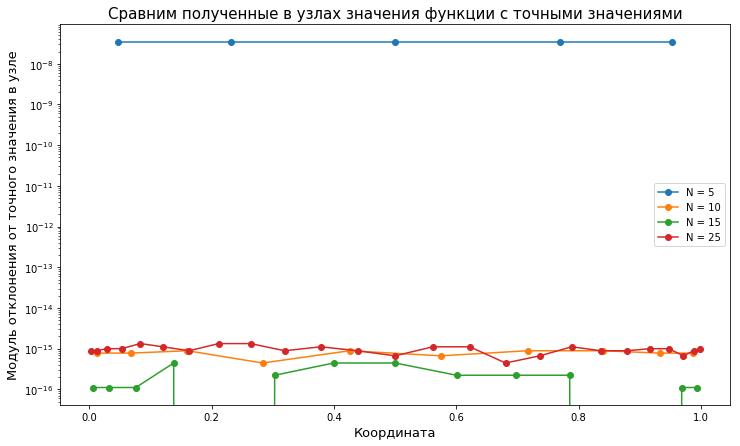

In [22]:
import matplotlib.pyplot as plt
# Заданные параметры для предложенного уравнения
a = 0
b = 1
lmbd = 1/2

# Заданные функции
def K(x, t):
    return 1

def g(x):
    return np.sin(np.pi*x)

plt.figure(figsize=(12, 7)) 


# Сначала создадим списки для построения точного решения
x_lst = np.linspace(0, 1, 100)
y_lst = np.sin(np.pi*x_lst) + 2/np.pi
plt.plot(x_lst, y_lst, label = 'Точное решение')
# Теперь построим точки численного решения для разных N
for N in [5, 10, 15, 25]:
    xx_lst = FE_sol(a, b, lmbd, K, g, N)[0]
    yy_lst = FE_sol(a, b, lmbd, K, g, N)[1]
    plt.plot(xx_lst, yy_lst, 'o', label = 'N = %s' % N)

plt.grid()   
plt.legend()

plt.figure(figsize=(12, 7)) 
for N in [5, 10, 15, 25]:
    xx_lst = FE_sol(a, b, lmbd, K, g, N)[0]
    yy_lst = FE_sol(a, b, lmbd, K, g, N)[1]
    delt_lst = abs(np.sin(np.pi*xx_lst) + 2/np.pi - yy_lst)
    
    plt.semilogy(xx_lst, delt_lst, '-o', label = 'N = %s' % N)
    plt.grid()
    plt.legend()
    plt.xlabel('Координата', fontsize = 13)
    plt.ylabel('Модуль отклонения от точного значения в узле', fontsize = 13)
plt.title('Сравним полученные в узлах значения функции с точными значениями', fontsize = 15)


На каком N можно остановиться? Будем счиать модуль отклонения полученного значения функции от её точного значения в каждом узле. Останавливаться будем тогда, когда среднее значение этих отклонений будет меньше заранее заданной точности.

In [23]:
def opt_N(FE_sol, a, b, lmbd, K, g, eps):
    delt=[] # Будущий массив отклонений
    N = 1
    while 0==0 :
        xx_lst = FE_sol(a, b, lmbd, K, g, N)[0]
        yy_lst = FE_sol(a, b, lmbd, K, g, N)[1] # Полученные значения
        y_true = np.sin(np.pi*xx_lst) + 2/np.pi # Точноезначение в узлах
        delt = np.array(abs(yy_lst - y_true))
        d = np.mean(delt)               
        if d > eps:
            N = N + 1
        else:
            return N

Text(0, 0.5, 'Необходимое количество узлов')

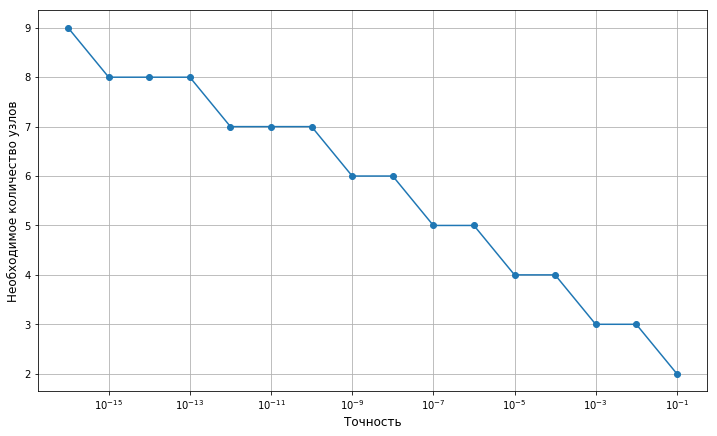

In [24]:
N_lst = []
x = []
for i in range(1, 17): # Рассмотрим точность до 10^(-16)
    N_lst.append(opt_N(FE_sol, a, b, lmbd, K, g, eps = 10**(-i)))
    x.append(10**(-i))
NN = np.array(N_lst)
x = np.array(x)

plt.figure(figsize=(12, 7)) 
plt.semilogx(x, NN, '-o')
plt.grid()
plt.xlabel('Точность', fontsize =12)
plt.ylabel('Необходимое количество узлов', fontsize =12)

### Task 2.2
(20% of the grade)

An obvious issue with the privious result for $f(x)$ that it returns the solution on a fixed set of points. We do not control precise positions of these points.

1. First, let's try to interpolate the values obtained in the previous task to a uniform grid of length 50. You may use any interpolation method. Compare the interpolation values with exact solution values.

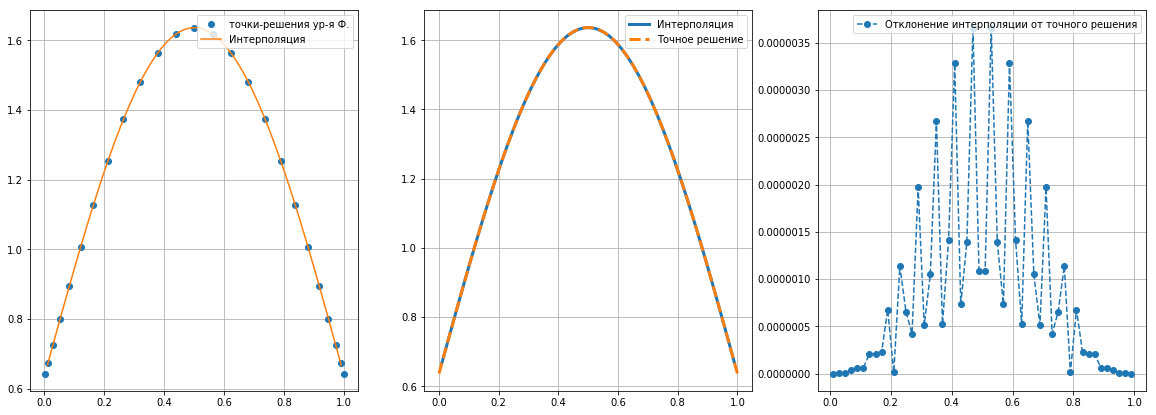

In [25]:
from scipy import interpolate

xx_lst = FE_sol(a, b, lmbd, K, g, 25)[0] # N = 25
yy_lst = FE_sol(a, b, lmbd, K, g, 25)[1]

plt.figure(figsize=(20, 7)) 

ff = interpolate.interp1d(xx_lst, yy_lst, kind = 'cubic') # Используем библиотечный интерполятор
xnew = np.arange(0.01, 1, 1/50)
ynew = ff(xnew) 
plt.subplot(131)
plt.plot(xx_lst, yy_lst, 'o', label = 'точки-решения ур-я Ф.')
plt.plot(xnew, ynew, '-', label ='Интерполяция')
plt.grid()
plt.legend(loc =1)

plt.subplot(132)
plt.plot(xnew, ynew, '-',linewidth=3, label ='Интерполяция')
plt.plot(x_lst, y_lst, '--',linewidth=3, label = 'Точное решение')
plt.grid()
plt.legend()

plt.subplot(133)

yyy_lst = abs(np.sin(np.pi*xnew) + 2/np.pi - ynew)

plt.plot(xnew, yyy_lst, '--o', label = 'Отклонение интерполяции от точного решения')
plt.grid()
plt.legend(loc=1)


2. Now use the following formula to calculate the function at points of the same uniform grid.
$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$
Again, compare the interpolation values with the exact solution values, and also with the direct interpolation method.

In [26]:
def f(g, K, lmbd, N, xx, FE_sol):
    
    summ = 0
    x = FE_sol(a, b, lmbd, K, g, N)[0] # Узлы
    y = FE_sol(a, b, lmbd, K, g, N)[1] # Значение интерполируемой функции в узлах

    w = special.ps_roots(N)[1]
    A = np.empty((N, N)) # Матрица для решения системы уравнений
    
    for j in range(N):
        summ += w[j] * K(xx, x[j])*y[j]
    summ = summ*lmbd
    
    return g(xx) + summ

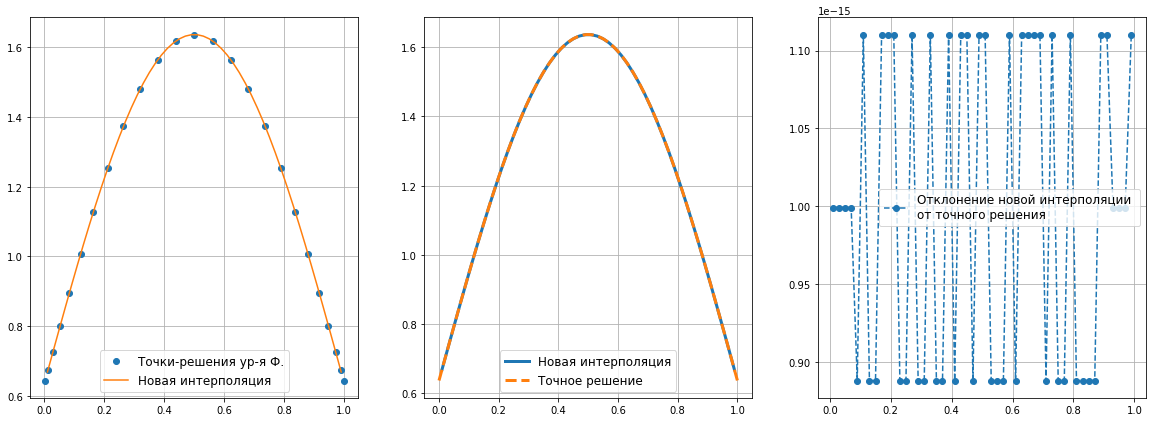

In [27]:
import matplotlib.pyplot as plt

# Заданные параметры для предложенного уравнения
a = 0
b = 1
lmbd = 1/2

# Заданные функции
def K(x, t):
    return 1

def g(x):
    return np.sin(np.pi*x)

xnew = np.arange(0.01, 1, 1/50)   # Новая интерполяция на старой равномерной сетке
ynew = f(g, K, lmbd, 25, xnew, FE_sol)

xx_lst = FE_sol(a, b, lmbd, K, g, 25)[0] # N = 25
yy_lst = FE_sol(a, b, lmbd, K, g, 25)[1] # точки-решения уравнения Фредгольма

x_lst = np.linspace(0, 1, 100)  # Задаём точное решение предложенного уравнения 
y_lst = np.sin(np.pi*x_lst) + 2/np.pi

ff = interpolate.interp1d(xx_lst, yy_lst, kind = 'cubic')
delta_new = ff(xnew)

plt.figure(figsize=(20, 7))

plt.subplot(131)
plt.plot(xx_lst, yy_lst, 'o', label = 'Точки-решения ур-я Ф.')
plt.plot(xnew, ynew, label = 'Новая интерполяция')
plt.grid()
plt.legend(loc=8, fontsize = 12)

plt.subplot(132)
plt.plot(xnew, ynew, linewidth = 3, label = 'Новая интерполяция')
plt.plot(x_lst, y_lst, '--',linewidth = 3, label = 'Точное решение')
plt.grid()
plt.legend(loc=8, fontsize = 12)

plt.subplot(133)
yyy_lst = abs(np.sin(np.pi*xnew) + 2/np.pi - ynew)
plt.plot(xnew, yyy_lst, '--o', label = 'Отклонение новой интерполяции \nот точного решения')
plt.grid()
plt.legend(loc=7, fontsize = 12)


Таким образом, можно видеть, что новая интерполяция отклоняется от точного решения меньше, чем старая. Для наглядности совместим графики ошибок.

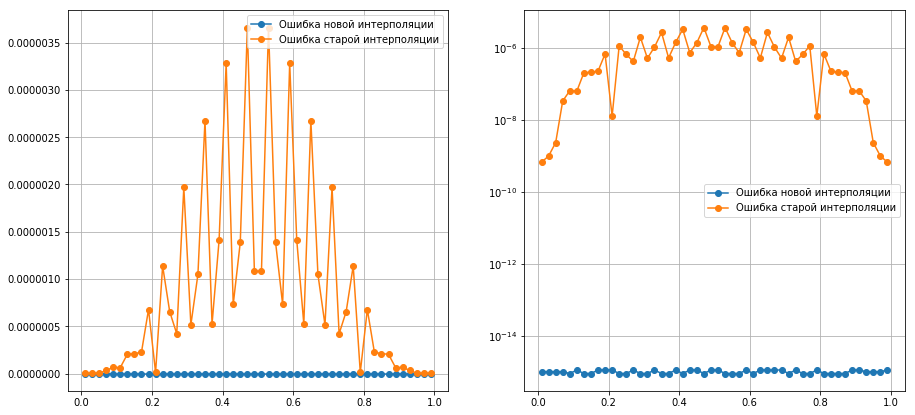

In [28]:
xnew = np.arange(0.01, 1, 1/50)   # Новая интерполяция на старой равномерной сетке
ynew = f(g, K, lmbd, 25, xnew, FE_sol)
yyy_lst = abs(np.sin(np.pi*xnew) + 2/np.pi - ynew) # Ошибка новой интерполяции

ff = interpolate.interp1d(xx_lst, yy_lst, kind = 'cubic') # Используем библиотечный интерполятор
ynew_old = ff(xnew) 
yyy_old_lst = abs(np.sin(np.pi*xnew) + 2/np.pi - ynew_old)

plt.figure(figsize=(15, 7))

plt.subplot(121)
plt.plot(xnew, yyy_lst, '-o', label = 'Ошибка новой интерполяции')
plt.plot(xnew, yyy_old_lst, '-o', label = 'Ошибка старой интерполяции')
plt.grid()
plt.legend(loc = 1)

plt.subplot(122)
plt.semilogy(xnew, yyy_lst, '-o', label = 'Ошибка новой интерполяции')
plt.semilogy(xnew, yyy_old_lst, '-o', label = 'Ошибка старой интерполяции')
plt.grid()
plt.legend(loc = 'best')

Теперь можно уверенно сказать, что последний способ интерполяции работает значительно лучше, так как его отклонение от точного решения на несколько порядков меньше, чем отклонение прямого метода интерполяции.